# Lab 1 Numpy CNN for inference

In this lab, you are required to fill in the blanks with your code **independently** to complete the inference process of a CNN. Note that there's a bonus at the end of this lab.

**Requirements**

**1. Complete the codes independently.**

**2. Make sure your results are reproducible.**

**3. Do not change the structure of the CNN and the given codes.**

**4. Do not add additional libraries.**

**Submission**

**1. Please submit only this ipynb file via Blackboard.**

**2. Name the ipynb file as "StudentID_StudentName".**

**3. Submit before Oct. 22nd 23:59:59.**

In [1]:
import numpy as np

Define a simple CNN that classifies CIFAR images.
The network provided is similar to LeNet-5, and it has the following architecture:

**Layer** | **Type** | **Input Shape** | **Output Shape** | **Activation**
--- | --- | --- | --- | ---
conv1 | Convolutional | 3x32x32 | 12x28x28 | ReLU 
pool1 | Max pool | 12x28x28 | 12x14x14 | None                
conv2 | Convolutional | 12x14x14 | 32x12x12 | ReLU                
pool2 | Max pool | 32x12x12 | 32x6x6 | None                
fc1 | Fully-connected | 1152 | 256 | ReLU                
fc2 | Fully-connected | 256 | 64 | ReLU                
fc3 | Fully-connected | 64 | 10 | None                

Next, we will build convolution, relu, max-pooling and fully-connected layers using **numpy** respectively (only forward propagation is required for inference).

In [2]:
class ReLU():
    def __init__(self):
        pass

    def forward(self,input):
        # TODO (5 pts) 
        # forward propagation for relu layer
        output = np.maximum(0, input)
        return output

In [3]:
class ConvLayer:  
    def __init__(self, input_channels, output_channels, kernel_size, stride, padding):   
        self.input_channels = input_channels   
        self.kernel_size = kernel_size  
        self.stride = stride
        self.padding = padding 
  
    def forward(self, x, weight):  
        """    
        input x: (N, C, H, W) [batchsize, input channels, x_height, x_width]
        input w: (K, C, R, S) [output channels, input channels, w_height, w_width] 
        output: (N, K, P, Q) [batchsize, output channels, output_height, output_width]
        """  
        N, C, H, W = x.shape
        K, C, R, S = weight.shape
        
        # TODO (5 pts)  
        # complete padding operation
        weight = weight.numpy()
        self.weight_shape = weight.shape
        self.input_shape = x.shape
        x_pad = np.zeros((N, C, H+self.padding*2, W+self.padding*2))
        for n in range(0, N):
            for c in range(0, C):
                x_pad[n, c, :, :] = np.pad(x[n, c, :, :], self.padding)
        x = x_pad
        
        # TODO (5 pts)  
        # compute output size using self.padding and self.stride
        P = (H + self.padding*2 - R) // self.stride + 1
        Q = (W + self.padding*2 - S) // self.stride + 1
        
        output = np.zeros((N, K, P, Q)) 
        # TODO (20 pts)
        # complete convolution operation        
        
        # raise error
        if (isinstance(self.kernel_size, int)):
            if (R!=self.kernel_size or S!=self.kernel_size):
                raise ValueError("Weight size should be same as kernel size")
        else:
            if ((R, S) != self.kernel_size):
                raise ValueError("Weight size should be same as kernel size")
            
        for n in range(0, N):
            for k in range(0, K):
                for i in range(0, P):
                    for j in range(0, Q):
                        for c in range(0, C):
                            output[n, k, i, j] += np.sum(x[n, c, i*self.stride:(i*self.stride+R), j*self.stride:(j*self.stride+S)] * weight[k, c, :, :])
        
        return output
  

In [4]:
class MaxPooling2D:  
    def __init__(self, pool_size=(2, 2), stride=2):  
        self.pool_size = pool_size  
        self.stride = stride  
  
    def forward(self, x):  
        """    
        input x: (N, C, H, W) [batchsize, input channels, x_height, x_width]
        output: (N, C, pooled_height, pooled_width)
        """  
        N, C, H, W = x.shape  
        self.input_shape = x.shape
        # TODO (5 pts) 
        # compute output size using self.pool_size and self.stride
        pooled_height = (H - self.pool_size[1]) // self.stride + 1
        pooled_width = (W - self.pool_size[0]) // self.stride + 1
  
        output = np.zeros((N, C, pooled_height, pooled_width))  
        # TODO (10 pts)
        # complete max-pooling operation 
        for n in range(0, N):
            for c in range(0, C):
                for i in range(0, pooled_height):
                    for j in range(0, pooled_width):
                        output[n, c, i, j] = np.max(x[n, c, i*self.stride:i*self.stride+self.pool_size[1], j*self.stride:j*self.stride+self.pool_size[0]])
        return output 

In [5]:
class fclayer():
    def __init__(self, in_features, out_features):
        self.in_features = in_features
        self.out_features = out_features
        
    def forward(self, x, weight):   
        # TODO (10 pts)
        # complete forward propagation of fully-connected layer
        
        # raise error
        weight = weight.numpy()
        x = x.reshape(len(x), -1)
        N, X = x.shape
        self.batch_size = X
        if (X != self.in_features):
            raise ValueError("input size should be same as in_features")
        if (weight.shape != (self.out_features, self.in_features)):
            raise ValueError("weight size should be same as features")
            
        output = np.zeros((N, self.out_features))
        output = np.dot(x, weight.T)
        return output  

In [6]:
import torch

# load trained parameters
ckpt = torch.load('./model/model.pth')

/tmp/ipykernel_591891/1781738737.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('./model/model.pth')


In [7]:
def lenet_inf(x,ckpt):
    # TODO (20 pts)
    # build the CNN network using classes above
    relu = ReLU()
    conv1 = ConvLayer(3, 12, 5, 1, 0)
    pool1 = MaxPooling2D()
    conv2 = ConvLayer(12, 32, 3, 1, 0)
    pool2 = MaxPooling2D()
    fc1 = fclayer(1152, 256)
    fc2 = fclayer(256, 64)
    fc3 = fclayer(64, 10)
    global layers, layers_name
    layers = [conv1, relu, pool1, conv2, relu, pool2, fc1, relu, fc2, relu, fc3]
    layers_name = ['conv1', 'relu_conv1', 'pool1', 'conv2', 'relu_conv2', 'pool2', 'fc1', 'relu_fc1', 'fc2', 'relu_fc2', 'fc3']

    for index, layer in enumerate(layers):
        try:
            weight = ckpt[layers_name[index] + '.weight']
            weight = weight.cpu()
            x = layer.forward(x, weight)
        except KeyError:
            x = layer.forward(x)
    output = x
    
    return output


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.transform import resize

# In this lab we will only infer 1 picture from CIFAR-10 datasets to save running time
# you can try different pictures in ./pictures
input_image = imageio.imread('./pictures/bird1.png')

# TODO (5 pts)
# normalize the pixel into [0,1]
image = (input_image - np.min(input_image)) / (np.max(input_image) - np.min(input_image))

# TODO (5 pts)
# alter the size of the pixel matrix from (32,32,3) to (1,3,32,32) to fit convolution layer
image = np.transpose(image, (2, 0, 1)).reshape(1, 3, 32, 32)


[[-0.12599775 -1.04894672  0.3045248   0.98443508 -0.08610649  0.85200856
   0.44564527 -0.44812607 -0.40659947 -0.74400583]]
Predicted label: 3
Ground truth: 3


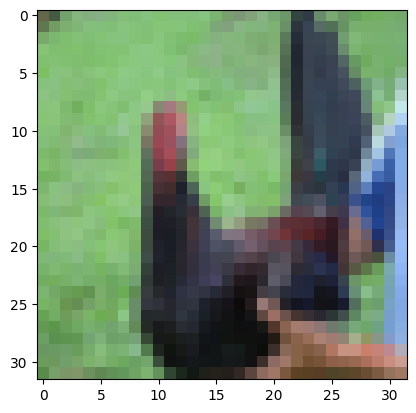

In [9]:
# TODO (5 pts)
# inference using lenet_inf created above
# note that the inference process of 1 picture using numpy may take more than 20 minutes
output = lenet_inf(image, ckpt)
print(output)
label = np.argmax(output)

import matplotlib.pyplot as plt
# visualize the picture to be classified
plt.imshow(input_image)
print("Predicted label:",label)
print("Ground truth: 3")

Bonus: Calculate the number of computations and parameters. Visualize your results directly in the outputs of your codes. 

Give your answer here.  

In [10]:
def calc_comput_param(layers, layers_name):
    layers_include = []
    params = []
    computs = []

    for index, layer in enumerate(layers):
        if (isinstance(layer, ConvLayer)):
            N, C, H, W = layer.input_shape
            K, C, R, S = layer.weight_shape
            P = (H + layer.padding*2 - R) // layer.stride + 1
            Q = (W + layer.padding*2 - S) // layer.stride + 1
            layer_param = K * C * R * S
            layer_mult = (C * R * S) * (P * Q) * K
            layer_add = (C * R * S - 1) * (P * Q) * K
            layers_include.append(layers_name[index])
            params.append(layer_param)
            computs.append(layer_mult + layer_add)
        elif (isinstance(layer, fclayer)):
            layer_param = layer.in_features * layer.out_features
            layer_mult = layer_param
            layer_add = (layer.in_features - 1) * layer.out_features
            layers_include.append(layers_name[index])
            params.append(layer_param)
            computs.append(layer_mult + layer_add)
        elif (isinstance(layer, MaxPooling2D)):
            N, C, H, W = layer.input_shape 
            pooled_height = (H - layer.pool_size[1]) // layer.stride + 1
            pooled_width = (W - layer.pool_size[0]) // layer.stride + 1
            layer_param = 0
            layer_comput = (layer.pool_size[0] * layer.pool_size[1] - 1) * (pooled_height * pooled_width * C * N)
            layers_include.append(layers_name[index])
            params.append(layer_param)
            computs.append(layer_comput)
    return layers_include, params, computs


In [11]:
def visualize_results(layers, params, computs):
    x = np.arange(len(layers))

    # Plot number of parameters
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(x, params, color='blue')
    plt.xticks(x, layers, rotation=45)
    plt.xlabel('Layers')
    plt.ylabel('Number of Parameters')
    plt.title('Parameters per Layer')
    for a,b in zip(x,params):
        plt.text(a,b,'%d'%b,ha='center',va='bottom',fontsize=7)

    # Plot number of computations
    plt.subplot(1, 2, 2)
    plt.bar(x, computs, color='green')
    plt.xticks(x, layers, rotation=45)
    plt.xlabel('Layers')
    plt.ylabel('Number of Computations')
    plt.title('Computations per Layer')
    for a,b in zip(x,computs):
        plt.text(a,b,'%d'%b,ha='center',va='bottom',fontsize=7)

    plt.tight_layout()
    plt.show()

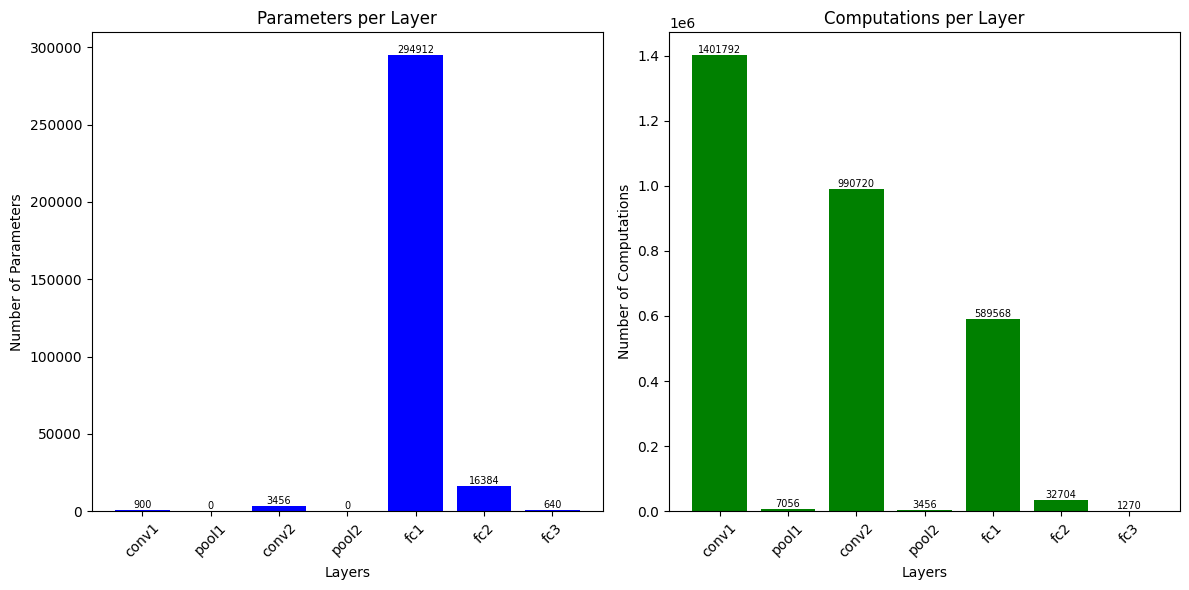

In [12]:
layers_include, params, computs = calc_comput_param(layers, layers_name)
visualize_results(layers_include, params, computs)